In [33]:
import pandas as pd
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('./data/imob/imob.csv')
df.head()

/tmp/ipykernel_71643/3909342104.py:1: DtypeWarning: Columns (3,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/imob/imob.csv')


,TIPO,NOME,CPF,CELULAR,CELULAR 1,RESIDENCIAL,RESIDENCIAL 1,COMERCIAL,EMAIL,EMAIL 1,PROFISSAO,RENDA,ESTADO_CIVIL,SEXO,DATA_NASCIMENTO,FALECIDO
0,LOCATARIO,GILBERTO ZORZO,380.345.909-59,48988041723,NaN,4832348065,4832220061,4.832220e+09,giulianozorzo@gmail.com,gilberto@gilbertozorzo.com.br,Dentista,11.597,OUTROS,MASCULINO,20.02.1960,NAO
1,LOCATARIO,HERCILIO EMERICH LENTZ,909.195.999-15,48991591118,4.899904e+10,48999036336,NaN,4.832293e+09,hercilioemerich.lentz@gmail.com,hercilio@lentzadvocacia.adv.br,Advogado,7.947,CASADO,MASCULINO,27.06.1973,NAO
2,PROPRIETARIO,KOERICH ENG E TELECOMUNICAÇÕES S.A,81.777.203/0001-90,48984757825,4.899153e+10,4832835890,482713800,4.832714e+09,fvieira@kch.com.br,andreiabc@kch.com.br,Administrador,NaN,CASADO,MASCULINO,NaN,NAO
3,LOCATARIO,PEDRO JONAS KOERICH,029.806.069-87,48933656119,4.893371e+10,4832713800,4832123800,4.832124e+09,katia@koprime.com.br,richard@kch.com.br,Engenheiro,7.548,CASADO,MASCULINO,06.08.1945,NAO
4,LOCATARIO,UNIÃO SUL BRAS. DA IGREJA ADVENTISTA,79.080.602/0004-07,48984312751,4.899987e+10,4832813000,NaN,4.832813e+09,felipe.spk@hotmail.com,lenilson.valgas@adventistas.org.br,Pesssoa Juridica De Direito Privado,236.000.000,OUTROS,MASCULINO,NaN,NAO


## Corrigindo variáveis

In [35]:
df.PROFISSAO.unique()[:100]

array(['Dentista', 'Advogado', 'Administrador', 'Engenheiro',
       'Pesssoa Juridica De Direito Privado', 'Empresário', 'Técnico',
       'Arquiteto', 'Militar', 'Comerciante', 'Professor Universitário',
       'Contador', 'Bancaria', 'Aposentado', nan, 'Funcionário Público',
       'Gerente', 'Médico', 'Professora', 'Autônomo', 'Farmacêutico',
       'Servidor Público', 'Vendedora', 'Funcionária Pública',
       'Cirurgiã Dentista', 'Despachante', 'Professor',
       'Aux. Administrativo', 'P.J. Direito Privada', 'Economista',
       'Fiscal', 'Agricultor', 'Bancário Aposentado', 'Func. Público',
       'Autonômo', 'Diplomata', 'Encarregado', 'Pensionista',
       'Torneiro Mecânico', 'Func.Pub.Estado', 'Tecnico', 'Ceo',
       'Inspetor De Polícia', 'Contabilista', 'Operario',
       'Letrista Aposen', 'Func.Publico Apos.', 'Assit.Organizacional',
       'Eletricista', 'Pastor', 'Professor Universitario', 'Empresario',
       'Representante Comercial', 'Bancário', 'Delegado De Poli

In [36]:
df['RENDA'] = df['RENDA'].str.replace('.', '', regex=False).astype('float')

In [37]:
df['DATA_NASCIMENTO'] = pd.to_datetime(df['DATA_NASCIMENTO'], format='%d.%m.%Y', errors='coerce')

df.head()

,TIPO,NOME,CPF,CELULAR,CELULAR 1,RESIDENCIAL,RESIDENCIAL 1,COMERCIAL,EMAIL,EMAIL 1,PROFISSAO,RENDA,ESTADO_CIVIL,SEXO,DATA_NASCIMENTO,FALECIDO
0,LOCATARIO,GILBERTO ZORZO,380.345.909-59,48988041723,NaN,4832348065,4832220061,4.832220e+09,giulianozorzo@gmail.com,gilberto@gilbertozorzo.com.br,Dentista,11597.0,OUTROS,MASCULINO,1960-02-20,NAO
1,LOCATARIO,HERCILIO EMERICH LENTZ,909.195.999-15,48991591118,4.899904e+10,48999036336,NaN,4.832293e+09,hercilioemerich.lentz@gmail.com,hercilio@lentzadvocacia.adv.br,Advogado,7947.0,CASADO,MASCULINO,1973-06-27,NAO
2,PROPRIETARIO,KOERICH ENG E TELECOMUNICAÇÕES S.A,81.777.203/0001-90,48984757825,4.899153e+10,4832835890,482713800,4.832714e+09,fvieira@kch.com.br,andreiabc@kch.com.br,Administrador,NaN,CASADO,MASCULINO,NaT,NAO
3,LOCATARIO,PEDRO JONAS KOERICH,029.806.069-87,48933656119,4.893371e+10,4832713800,4832123800,4.832124e+09,katia@koprime.com.br,richard@kch.com.br,Engenheiro,7548.0,CASADO,MASCULINO,1945-08-06,NAO
4,LOCATARIO,UNIÃO SUL BRAS. DA IGREJA ADVENTISTA,79.080.602/0004-07,48984312751,4.899987e+10,4832813000,NaN,4.832813e+09,felipe.spk@hotmail.com,lenilson.valgas@adventistas.org.br,Pesssoa Juridica De Direito Privado,236000000.0,OUTROS,MASCULINO,NaT,NAO


## Criando marcações

In [38]:
df['idade'] = df['DATA_NASCIMENTO'].apply(lambda x: (datetime.now() - x) // timedelta(days=365.2425) if not pd.isna(x) and x.year < datetime.now().year else -1)
df['is_over_35'] = df['idade'].apply(lambda x: 1 if x >= 35 else 0)

In [39]:
df['not_single'] = df['ESTADO_CIVIL'].apply(lambda x: 0 if x == 'SOLTEIRO' else 1)
df['RENDA'] = df.groupby('PROFISSAO').RENDA.transform(lambda x: x.mean())
df = df.query('RENDA < 1000000')

In [40]:
def get_faixa_salario(salario):
    if pd.isna(salario):
        return -1
    elif salario <= 15000:
        return 1
    elif salario <= 55000:
        return 2
    elif salario > 55000:
        return 3
df['faixa_salario'] = df['RENDA'].apply(lambda x: get_faixa_salario(x))

In [41]:
df['CPF'] = df['CPF'].fillna('0')
df['is_pf'] =  df['CPF'].apply(lambda x: 1 if re.search(r'\d{3}\.\d{3}\.\d{3}-\d{2}', x) else 0)

In [42]:
df['has_email'] = df['EMAIL'].combine_first(df['EMAIL 1']).apply(lambda x: 1 if not pd.isna(x) else 0)

In [43]:
df = df.where(df.FALECIDO == 'NAO')

In [44]:
def get_tipo_seguro(salario):
    if pd.isna(salario):
        return 'FALTANTE'
    elif salario <= 15000:
        return 'S300'
    elif salario <= 55000:
        return 'S700'
    elif salario > 55000:
        return 'S1500'
df['tipo_seguro'] = df['RENDA'].apply(lambda x: get_tipo_seguro(x))

## Verificações das marcações

In [45]:
df[['is_over_35', 'faixa_salario', 'has_email', 'is_pf']].isna().sum()

is_over_35       142
faixa_salario    142
has_email        142
is_pf            142
dtype: int64

In [46]:
df['is_over_35'].value_counts()

is_over_35
1.0    78778
0.0    11105
Name: count, dtype: int64

In [47]:
df_val = df.query('is_over_35 == 1 and not_single == 1 and is_pf == 1')#['PROFISSAO'].unique()

In [48]:
df_val.groupby('tipo_seguro').agg({'is_over_35': 'mean'})

,is_over_35
tipo_seguro,
S1500,1.0
S300,1.0
S700,1.0


In [49]:
df_val.is_over_35.unique()

array([1.])

RENDA < 12000 seguro s300
RENDA 15000 - 50000 s700
RENDA > 50000 S1500

In [50]:
df['not_single'].value_counts()

not_single
1.0    56884
0.0    32999
Name: count, dtype: int64

In [51]:
df['faixa_salario'].value_counts()

faixa_salario
1.0    75164
2.0    13767
3.0      952
Name: count, dtype: int64

In [52]:
df['is_pf'].value_counts()

is_pf
1.0    89571
0.0      312
Name: count, dtype: int64

In [53]:
df['is_pf'].value_counts() / df.shape[0]

is_pf
1.0    0.994957
0.0    0.003466
Name: count, dtype: float64

In [54]:
df['has_email'].value_counts()

has_email
1.0    62841
0.0    27042
Name: count, dtype: int64

In [55]:
df.query('has_email == 0')

,TIPO,NOME,CPF,CELULAR,CELULAR 1,RESIDENCIAL,RESIDENCIAL 1,COMERCIAL,EMAIL,EMAIL 1,...,SEXO,DATA_NASCIMENTO,FALECIDO,idade,is_over_35,not_single,faixa_salario,is_pf,has_email,tipo_seguro
7,PROPRIETARIO,ENIO MARIO DE OLIVEIRA FILHO,246.028.339-34,48999810906,NaN,4830256953,4832222835,4.830257e+09,NaN,NaN,...,MASCULINO,1955-12-20,NAO,67.0,1.0,1.0,1.0,1.0,0.0,S300
53,FIADOR,ABEL EXTERKOTTER,761.296.169-53,NaN,NaN,4832221403,NaN,4.832164e+09,NaN,NaN,...,MASCULINO,1968-10-26,NAO,54.0,1.0,1.0,1.0,1.0,0.0,S300
55,FIADOR,ABEL GONÇALVES FILHO,008.852.401-97,NaN,NaN,4535244304,NaN,NaN,NaN,NaN,...,MASCULINO,1945-12-12,NAO,77.0,1.0,1.0,1.0,1.0,0.0,S300
64,FIADOR,ABELARDO MANOEL DE SOUZA,018.167.139-53,NaN,NaN,4830356517,NaN,NaN,NaN,NaN,...,MASCULINO,1924-09-25,NAO,99.0,1.0,1.0,1.0,1.0,0.0,S300
65,FIADOR,ABIATAR ABDON DE LIZ,415.170.169-91,NaN,NaN,4899479702,NaN,4.832712e+09,NaN,NaN,...,MASCULINO,1959-09-28,NAO,64.0,1.0,0.0,1.0,1.0,0.0,S300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99505,PROPRIETARIO,ZÉLIA APARECIDA SABATKE,775.854.299-91,NaN,NaN,4733467022.0,NaN,NaN,NaN,NaN,...,FEMININO,1956-12-22,NAO,66.0,1.0,1.0,2.0,1.0,0.0,S700
99506,PROPRIETARIO,ZÉLIA DO AMARAL,785.053.309-78,NaN,NaN,4832341935.0,NaN,NaN,NaN,NaN,...,FEMININO,1965-03-15,NAO,58.0,1.0,0.0,1.0,1.0,0.0,S300
99513,PROPRIETARIO,ÁLVARO JOÃO TUMELERO,592.224.509-06,49998250071.0,4.898415e+10,4991051635.0,NaN,NaN,NaN,NaN,...,MASCULINO,1968-02-06,NAO,55.0,1.0,1.0,1.0,1.0,0.0,S300
99517,PROPRIETARIO,ÂNGELA ESTER GROTTO PRETTO,416.944.149-49,49999940888.0,4.999994e+10,4934442284.0,NaN,NaN,NaN,NaN,...,FEMININO,1961-04-26,NAO,62.0,1.0,1.0,1.0,1.0,0.0,S300


## Análise Exploratória do Tipo do Seguro

<Axes: xlabel='count', ylabel='tipo_seguro'>

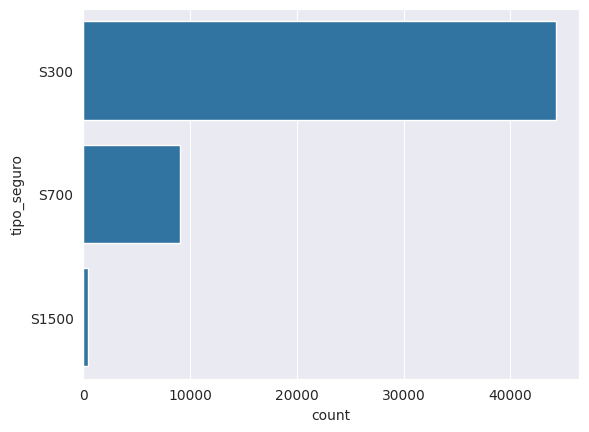

In [56]:
var_plot = df_val.query('tipo_seguro != "FALTANTE"')
sns.countplot(var_plot.tipo_seguro)

### S300

<Axes: xlabel='idade', ylabel='Count'>

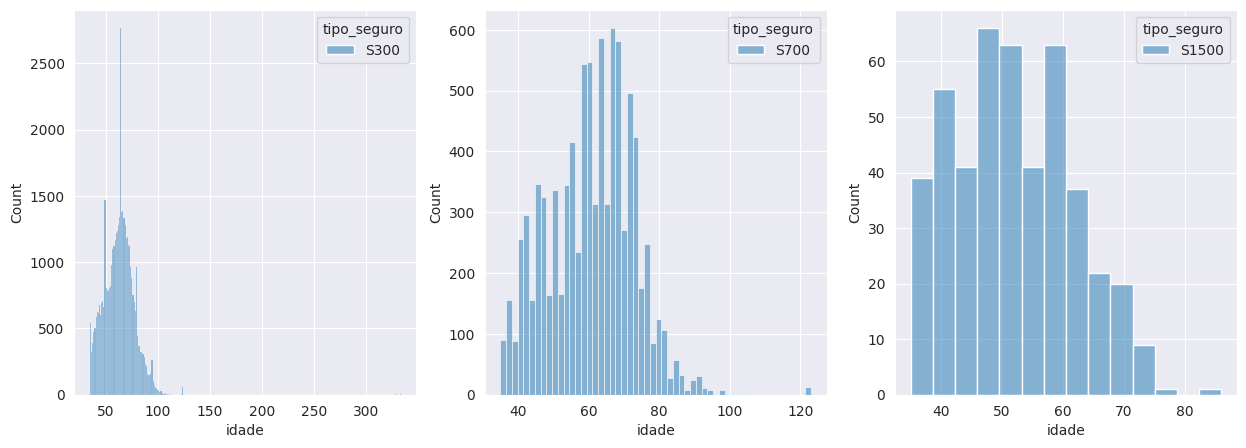

In [57]:
# Idade por tipo de seguro
df_aux = var_plot.query('tipo_seguro == "S300"')
df_aux_700 = var_plot.query('tipo_seguro == "S700"')
df_aux_1500 = var_plot.query('tipo_seguro == "S1500"')


fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(ax=axes[0], x=df_aux.idade, hue=df_aux.tipo_seguro)
sns.histplot(ax=axes[1], x=df_aux_700.idade, hue=df_aux_700.tipo_seguro)
sns.histplot(ax=axes[2], x=df_aux_1500.idade, hue=df_aux_1500.tipo_seguro)

É possível perceber que existe muita inconsistência no S300 sendo que o máximo da idade na classe é de mais de 300 anos

In [58]:
df_aux.query('idade > 300')

,TIPO,NOME,CPF,CELULAR,CELULAR 1,RESIDENCIAL,RESIDENCIAL 1,COMERCIAL,EMAIL,EMAIL 1,...,SEXO,DATA_NASCIMENTO,FALECIDO,idade,is_over_35,not_single,faixa_salario,is_pf,has_email,tipo_seguro
5867,FIADOR,CLEOMAR QUADROS DE MELLO,017.663.680-34,35991233112,NaN,3532313716,NaN,NaN,vanessasmello@hotmail.com,NaN,...,MASCULINO,1693-01-15,NAO,330.0,1.0,1.0,1.0,1.0,1.0,S300
10626,FIADOR,GEORGE ALBERTO LINS DE ARAUJO,457.197.724-72,NaN,NaN,4888043550,NaN,4.832462e+09,NaN,NaN,...,MASCULINO,1694-12-27,NAO,328.0,1.0,1.0,1.0,1.0,0.0,S300
36856,LOCATARIO,ATILIO CERA,433.548.159-49,48932245758.0,NaN,4833220643,4832227769,4.832246e+09,atiliocera@gmail.com,NaN,...,MASCULINO,1690-05-03,NAO,333.0,1.0,1.0,1.0,1.0,1.0,S300
52362,LOCATARIO,IVANDRO CARLOS FINATO,443.088.680-68,66992921424.0,NaN,6634273700,NaN,6.634274e+09,icfinato@bol.com.br,kafinato@hotmail.com,...,MASCULINO,1695-05-20,NAO,328.0,1.0,1.0,1.0,1.0,1.0,S300
57122,LOCATARIO,LAERCIO SILVA,376.947.159-87,48996133303.0,NaN,4834383957,NaN,4.821012e+09,jomeller@gmail.com,laercio.silvapt@uol.com.br,...,MASCULINO,1690-04-26,NAO,333.0,1.0,1.0,1.0,1.0,1.0,S300


Fora isso, a idade não aparenta ser diferencial na seleção do seguro, sendo que as 3 distribuições são muito parecidas.

## Estado Civil

<Axes: >

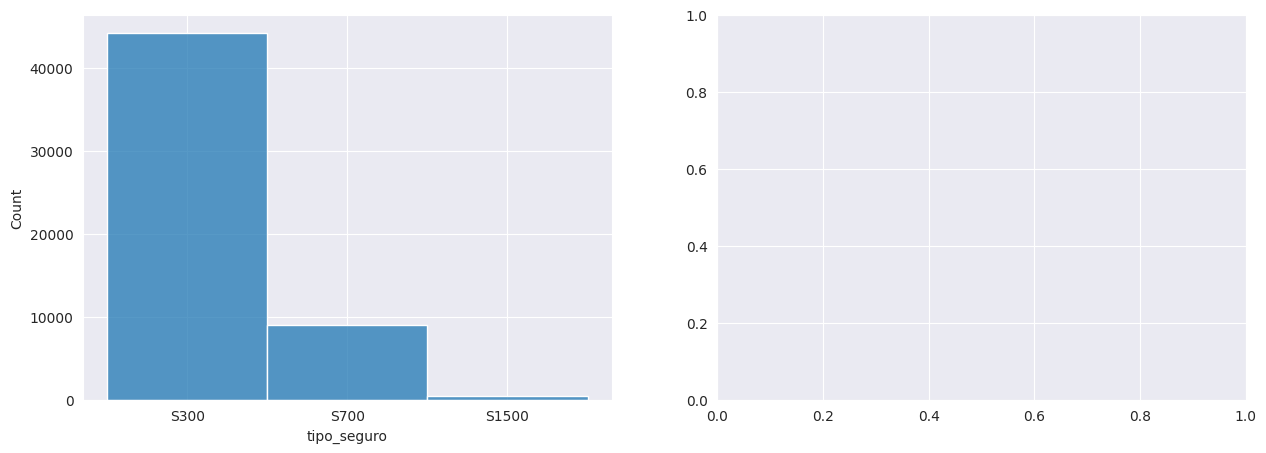

In [59]:
df_aux = var_plot.query('not_single == 1')
df_aux_0 = var_plot.query('not_single == 0')


fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(ax=axes[0], x=df_aux.tipo_seguro)
sns.countplot(ax=axes[1], x=df_aux_0.tipo_seguro)

Na amostra válida para estudo, não tem nenhuma pessoa marcada como solteira.

## Gênero

<Axes: xlabel='tipo_seguro', ylabel='count'>

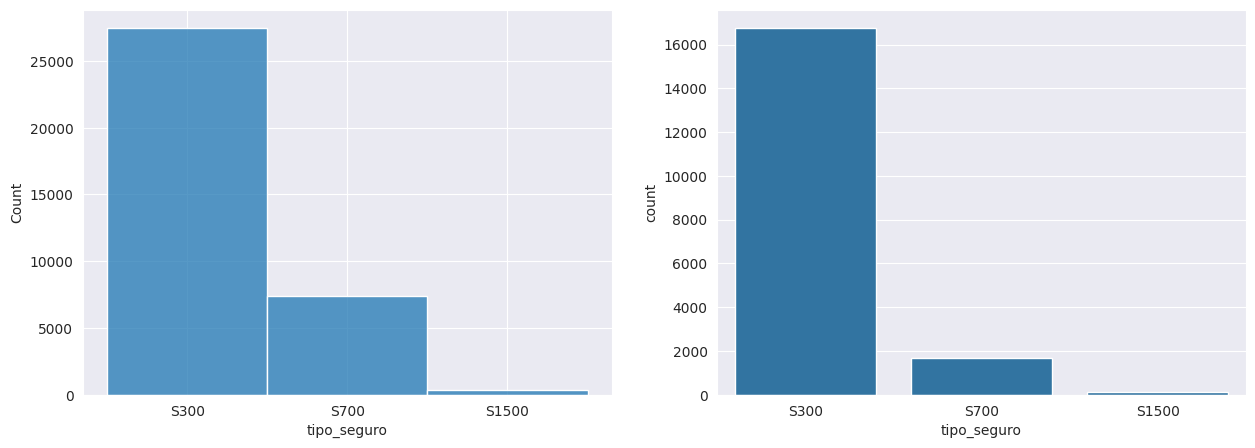

In [60]:
df_aux = var_plot.query('SEXO == "MASCULINO"')
df_aux_0 = var_plot.query('SEXO == "FEMININO"')


fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(ax=axes[0], x=df_aux.tipo_seguro)
sns.countplot(ax=axes[1], x=df_aux_0.tipo_seguro)

É perceptível que o gênero também não apresenta diferença de comportamento nas distribuições

In [61]:
df_val.describe()

,CELULAR 1,COMERCIAL,RENDA,DATA_NASCIMENTO,idade,is_over_35,not_single,faixa_salario,is_pf,has_email
count,6.983000e+03,2.053500e+04,53717.000000,53717,53717.000000,53717.0,53717.0,53717.000000,53717.0,53717.000000
mean,6.566732e+10,5.373324e+09,9141.148687,1960-10-23 09:34:51.159223360,62.511291,1.0,1.0,1.184969,1.0,0.661076
min,3.238092e+07,2.109900e+07,4.000000,1690-04-26 00:00:00,35.000000,1.0,1.0,1.000000,1.0,0.000000
25%,4.898401e+10,4.736442e+09,5411.236364,1952-02-12 00:00:00,53.000000,1.0,1.0,1.000000,1.0,0.000000
50%,4.899157e+10,4.832418e+09,6409.850200,1960-05-24 00:00:00,63.000000,1.0,1.0,1.000000,1.0,1.000000
75%,4.899956e+10,4.836214e+09,9187.258242,1970-06-19 00:00:00,71.000000,1.0,1.0,1.000000,1.0,1.000000
max,5.411154e+13,2.156024e+12,241583.000000,1988-10-23 00:00:00,333.000000,1.0,1.0,3.000000,1.0,1.000000
std,8.747899e+11,1.977591e+10,10083.604317,NaN,13.744610,0.0,0.0,0.409648,0.0,0.473349


<Axes: xlabel='RENDA', ylabel='Count'>

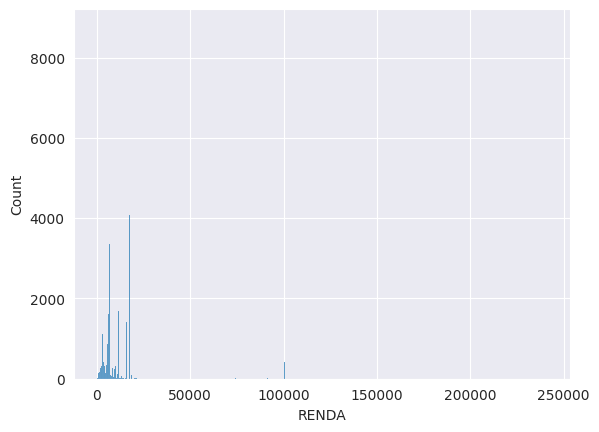

In [62]:
sns.histplot(df_val.RENDA)

In [65]:
df_val.to_csv('./data/imob/processed_leads.csv', index=False)